In [1]:
%matplotlib inline

import itertools
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.model_selection.score_vars import ScoreVariables
from ram.analysis.statistics import get_stats, rollup_returns

In [2]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0085,2018-05-01,True,"new params, longer params/hyperparms"


In [21]:
# Baseline
#drop_params = [('data_rank_flag', True)]
#runB = RunManager('StatArbStrategy', 'run_0124', drop_params=drop_params)

runB = RunManager('StatArbStrategy', 'run_0130')

In [22]:
d = dt.date(2013, 1, 1)

periods = [6, 12]
strats = [5, 10, 15]
criteria = ['min_sharpe', 'min_mean_sharpe', 'min_mean_sharpe_dd', 'mean_min', 'sharpe', 'mean_dd', 'sharpe_dd']

results = pd.DataFrame()

i = 0
for p, s, c in itertools.product(periods, strats, criteria):
    combG = CombinationSearch()
    combG.set_selection_criteria(c)
    combG.params['training_epochs'] = 1
    combG.params['training_periods'] = p
    combG.strats_per_port = s
    combG.add_run(runB)
    combG.start()

    rets = combG.best_results_returns.loc[d:].dropna()
    sharpe = (rets.mean() / rets.std()).mean()
    mean = rets.sum().mean()

    print 'Mean: {}, Sharpe: {}, P: {}, S: {}, C: {}'.format(mean, sharpe, p, s, c)
    results.loc[i, 'Periods'] = p
    results.loc[i, 'Strats'] = s
    results.loc[i ,'Criteria'] = c
    results.loc[i, 'Mean'] = mean
    results.loc[i, 'Sharpe'] = sharpe
    results.loc[i, 'DD'] = (rets - rets.cummax()).min().mean()

    i += 1

Reading and aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.292830171457, Sharpe: 0.11961627385, P: 6, S: 5, C: min_sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.304433817218, Sharpe: 0.109648637354, P: 6, S: 5, C: min_mean_sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.299751269668, Sharpe: 0.112717854861, P: 6, S: 5, C: min_mean_sharpe_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.296941220822, Sharpe: 0.105592003373, P: 6, S: 5, C: mean_min
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.288896240861, Sharpe: 0.100665113171, P: 6, S: 5, C: sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.300710002764, Sharpe: 0.0994180196146, P: 6, S: 5, C: mean_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.256372240555, Sharpe: 0.099254440182, P: 6, S: 5, C: sharpe_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.292383151458, Sharpe: 0.120690081282, P: 6, S: 10, C: min_sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.299337091319, Sharpe: 0.113150462484, P: 6, S: 10, C: min_mean_sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.281343510374, Sharpe: 0.11141603683, P: 6, S: 10, C: min_mean_sharpe_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.307092140655, Sharpe: 0.115442796114, P: 6, S: 10, C: mean_min
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.304158381094, Sharpe: 0.109229534416, P: 6, S: 10, C: sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.302924840251, Sharpe: 0.109351968474, P: 6, S: 10, C: mean_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.277420842511, Sharpe: 0.112400520258, P: 6, S: 10, C: sharpe_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.277233023992, Sharpe: 0.114534149825, P: 6, S: 15, C: min_sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.302229483197, Sharpe: 0.117959789078, P: 6, S: 15, C: min_mean_sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.294566180619, Sharpe: 0.1196605748, P: 6, S: 15, C: min_mean_sharpe_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.302239959437, Sharpe: 0.11724803567, P: 6, S: 15, C: mean_min
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.305049172304, Sharpe: 0.111632447789, P: 6, S: 15, C: sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.289316133576, Sharpe: 0.108494429113, P: 6, S: 15, C: mean_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.282168283446, Sharpe: 0.114423762794, P: 6, S: 15, C: sharpe_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.293732425316, Sharpe: 0.119593597209, P: 12, S: 5, C: min_sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.312809821622, Sharpe: 0.110812930426, P: 12, S: 5, C: min_mean_sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.301227691897, Sharpe: 0.111143170392, P: 12, S: 5, C: min_mean_sharpe_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.311705949311, Sharpe: 0.108684519499, P: 12, S: 5, C: mean_min
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.320166696916, Sharpe: 0.110372180147, P: 12, S: 5, C: sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.336413084468, Sharpe: 0.111832498903, P: 12, S: 5, C: mean_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.296655021548, Sharpe: 0.116306180806, P: 12, S: 5, C: sharpe_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.305679640988, Sharpe: 0.127938126503, P: 12, S: 10, C: min_sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.327971069772, Sharpe: 0.126686591447, P: 12, S: 10, C: min_mean_sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.312465580562, Sharpe: 0.124432780748, P: 12, S: 10, C: min_mean_sharpe_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.325726577317, Sharpe: 0.124180917617, P: 12, S: 10, C: mean_min
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.333559011502, Sharpe: 0.121898652866, P: 12, S: 10, C: sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.323353706138, Sharpe: 0.11927488862, P: 12, S: 10, C: mean_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.310010286931, Sharpe: 0.126429785382, P: 12, S: 10, C: sharpe_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.304492337776, Sharpe: 0.127467880341, P: 12, S: 15, C: min_sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.314444821603, Sharpe: 0.124603583177, P: 12, S: 15, C: min_mean_sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.309685950781, Sharpe: 0.126434721855, P: 12, S: 15, C: min_mean_sharpe_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.323877358285, Sharpe: 0.127200320479, P: 12, S: 15, C: mean_min
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.336793376222, Sharpe: 0.124438018165, P: 12, S: 15, C: sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.320289552984, Sharpe: 0.121387753209, P: 12, S: 15, C: mean_dd
Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 1/1 [00:24<00:00, 24.40s/it]

Mean: 0.307444468084, Sharpe: 0.127246855909, P: 12, S: 15, C: sharpe_dd


In [23]:
results130 = results.copy()

In [24]:
results130.groupby('Criteria')[['Mean', 'Sharpe', 'DD']].mean()

,Mean,Sharpe,DD
Criteria,,,
mean_dd,0.312168,0.111627,-0.017163
mean_min,0.311264,0.116391,-0.016103
min_mean_sharpe,0.310204,0.117144,-0.015658
min_mean_sharpe_dd,0.299840,0.117634,-0.014963
min_sharpe,0.294392,0.121640,-0.014310
sharpe,0.314770,0.113039,-0.017286
sharpe_dd,0.288345,0.116010,-0.014818


In [18]:
results124.groupby('Criteria')[['Mean', 'Sharpe', 'DD']].mean()

,Mean,Sharpe,DD
Criteria,,,
mean_dd,0.444938,0.092559,-0.033254
mean_min,0.461341,0.098230,-0.031376
min_mean_sharpe,0.455408,0.097576,-0.031247
min_mean_sharpe_dd,0.447231,0.097471,-0.031260
min_sharpe,0.429034,0.096610,-0.029864
sharpe,0.428159,0.090475,-0.032832
sharpe_dd,0.420864,0.093194,-0.031615


In [25]:
combG1 = CombinationSearch()
combG1.set_selection_criteria('min_sharpe')
combG1.params['training_epochs'] = 2
combG1.params['training_periods'] = 12
combG1.strats_per_port = 10
combG1.add_run(runB)
combG1.start()

  0%|          | 0/2 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 2/2 [00:49<00:00, 24.92s/it]


In [5]:
combG = CombinationSearch()
combG.set_selection_criteria('min_mean_sharpe')
combG.params['training_epochs'] = 2
combG.params['training_periods'] = 12
combG.strats_per_port = 10
combG.add_run(runB)
combG.start()

  0%|          | 0/2 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 2/2 [01:12<00:00, 36.02s/it]


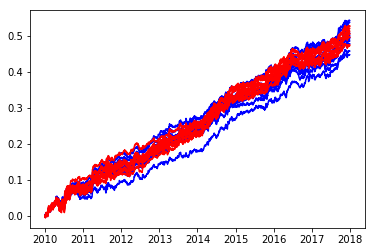

In [26]:
plt.figure()
plt.plot(combG.best_results_returns.dropna().cumsum(), 'b')
plt.plot(combG1.best_results_returns.dropna().cumsum(), 'r')
plt.show()

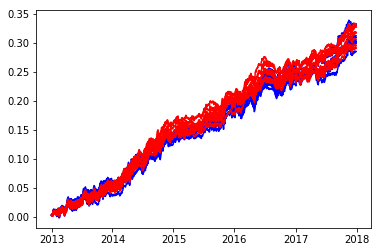

In [27]:
t = dt.date(2013, 1, 1)
plt.figure()
plt.plot(combG.best_results_returns.dropna().loc[t:].cumsum(), 'b')
plt.plot(combG1.best_results_returns.dropna().loc[t:].cumsum(), 'r')
plt.show()

In [28]:
df = pd.DataFrame()
df['MinSharpe'] = get_stats(combG.best_results_returns.dropna()).mean(axis=1)
df['Sharpe'] = get_stats(combG1.best_results_returns.dropna()).mean(axis=1)
df

,MinSharpe,Sharpe
Total,0.49451,0.50380
Mean,0.00023,0.00026
Std,0.00203,0.00201
Skew,0.29807,0.33531
Kurt,1.73400,2.11600
Sharpe,1.91423,1.98079
Sortino,3.59039,3.73372
MinRet,-0.00750,-0.00800
WinP,0.54561,0.54794
DD%,-0.02689,-0.02852


In [29]:
# Compare
drop_params = [('data_rank_flag', True)]
runA = RunManager('StatArbStrategy', 'run_0124', drop_params=drop_params)

runB = RunManager('StatArbStrategy', 'run_0130')

In [31]:
combA = CombinationSearch()
combA.set_selection_criteria('min_mean_sharpe')
combA.params['training_epochs'] = 2
combA.params['training_periods'] = 12
combA.strats_per_port = 10
combA.add_run(runA)
combA.start()

Reading and aggregating runs...


  0%|          | 0/2 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 2/2 [01:07<00:00, 33.42s/it]


In [30]:
combB = CombinationSearch()
combB.set_selection_criteria('min_sharpe')
combB.params['training_epochs'] = 2
combB.params['training_periods'] = 12
combB.strats_per_port = 10
combB.add_run(runB)
combB.start()

Reading and aggregating runs...


  0%|          | 0/2 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 2/2 [00:49<00:00, 24.69s/it]


In [39]:
df = pd.DataFrame()
df['NonRank'] = get_stats(combA.best_results_returns.dropna()).mean(axis=1)
df['MomRev'] = get_stats(combB.best_results_returns.dropna()).mean(axis=1)
df['MomRevScaled'] = get_stats(combB.best_results_returns.dropna() * 1.75).mean(axis=1)
df

,NonRank,MomRev,MomRevScaled
Total,0.89379,0.50380,0.88165
Mean,0.00043,0.00026,0.00043
Std,0.00402,0.00201,0.00351
Skew,0.18039,0.33531,0.33531
Kurt,2.24800,2.11600,2.11600
Sharpe,1.74861,1.98079,1.98079
Sortino,3.16246,3.73372,3.73372
MinRet,-0.01981,-0.00800,-0.01402
WinP,0.55280,0.54794,0.54794
DD%,-0.06857,-0.02852,-0.04994


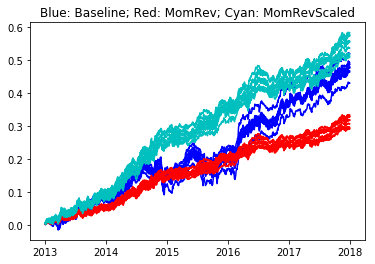

In [42]:
t = dt.date(2013, 1, 1)
plt.figure()
plt.plot(combA.best_results_returns.dropna().loc[t:].cumsum(), 'b')
plt.plot(combB.best_results_returns.dropna().loc[t:].cumsum(), 'r')
plt.plot(combB.best_results_returns.dropna().loc[t:].cumsum() * 1.75 , 'c')
plt.title('Blue: Baseline; Red: MomRev; Cyan: MomRevScaled')
plt.show()

In [34]:
dfA = rollup_returns(combA.best_results_returns.dropna())
dfA['yr'] = dfA.sum(axis=1)
dfA

Qtr,1,2,3,4,yr
Year,,,,,
2010,0.065519,-0.014103,0.078825,-0.009184,0.121057
2011,0.032773,0.035714,-0.022720,0.114347,0.160113
2012,0.025978,0.000721,0.043018,0.061127,0.130843
2013,-0.005676,0.033560,0.035053,0.023757,0.086695
2014,0.018000,0.034877,0.014215,-0.003752,0.063340
2015,0.012327,0.038441,-0.046300,0.055554,0.060022
2016,0.070806,0.026866,-0.006738,0.056707,0.147640
2017,0.020483,0.051331,0.020001,0.025730,0.117546


In [35]:
dfB = rollup_returns(combB.best_results_returns.dropna())
dfB['yr'] = dfB.sum(axis=1)
dfB

Qtr,1,2,3,4,yr
Year,,,,,
2010,0.037396,-0.009234,0.050271,0.009271,0.087704
2011,0.017953,0.031935,-0.002425,0.004898,0.052361
2012,0.009054,0.009311,0.022980,0.022280,0.063625
2013,0.010098,0.010656,0.016042,0.019767,0.056564
2014,0.018607,0.025205,0.031674,0.013301,0.088788
2015,0.008892,0.012105,0.009914,0.022891,0.053802
2016,0.010245,0.024634,-0.009293,0.016766,0.042351
2017,0.013361,0.008144,0.036102,0.017304,0.074911


# Sector 45

In [3]:
# Compare
runC = RunManager('StatArbStrategy', 'run_0133')

In [4]:
d = dt.date(2013, 1, 1)

periods = [6, 12]
strats = [5, 10, 15]
criteria = ['min_sharpe', 'min_mean_sharpe', 'min_mean_sharpe_dd', 'mean_min', 'sharpe', 'mean_dd', 'sharpe_dd']

results = pd.DataFrame()

i = 0
for p, s, c in itertools.product(periods, strats, criteria):
    combG = CombinationSearch()
    combG.set_selection_criteria(c)
    combG.params['training_epochs'] = 1
    combG.params['training_periods'] = p
    combG.strats_per_port = s
    combG.add_run(runC)
    combG.start()

    rets = combG.best_results_returns.loc[d:].dropna()
    sharpe = (rets.mean() / rets.std()).mean()
    mean = rets.sum().mean()

    print 'Mean: {}, Sharpe: {}, P: {}, S: {}, C: {}'.format(mean, sharpe, p, s, c)
    results.loc[i, 'Periods'] = p
    results.loc[i, 'Strats'] = s
    results.loc[i ,'Criteria'] = c
    results.loc[i, 'Mean'] = mean
    results.loc[i, 'Sharpe'] = sharpe
    results.loc[i, 'DD'] = (rets - rets.cummax()).min().mean()

    i += 1

Reading and aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.177342522049, Sharpe: 0.0782023144976, P: 6, S: 5, C: min_sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.182532551272, Sharpe: 0.0711034362877, P: 6, S: 5, C: min_mean_sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.179235624534, Sharpe: 0.0739783274511, P: 6, S: 5, C: min_mean_sharpe_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.186897123588, Sharpe: 0.0721004835173, P: 6, S: 5, C: mean_min
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.198931321708, Sharpe: 0.0759413263878, P: 6, S: 5, C: sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.153835381823, Sharpe: 0.0577035202738, P: 6, S: 5, C: mean_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.170135935352, Sharpe: 0.0727262882754, P: 6, S: 5, C: sharpe_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.194138502066, Sharpe: 0.088677082576, P: 6, S: 10, C: min_sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.1962455896, Sharpe: 0.0837522793415, P: 6, S: 10, C: min_mean_sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.17841936676, Sharpe: 0.0778520747172, P: 6, S: 10, C: min_mean_sharpe_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.196408837647, Sharpe: 0.0826017200136, P: 6, S: 10, C: mean_min
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.178566159669, Sharpe: 0.0742291952688, P: 6, S: 10, C: sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.171882886087, Sharpe: 0.0709441931013, P: 6, S: 10, C: mean_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.179382256015, Sharpe: 0.0804149445418, P: 6, S: 10, C: sharpe_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.201267309405, Sharpe: 0.0919743743615, P: 6, S: 15, C: min_sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.191911531692, Sharpe: 0.0836897727543, P: 6, S: 15, C: min_mean_sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.195798743859, Sharpe: 0.0880847548535, P: 6, S: 15, C: min_mean_sharpe_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.19582761335, Sharpe: 0.084202820934, P: 6, S: 15, C: mean_min
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.184142766527, Sharpe: 0.0803590471579, P: 6, S: 15, C: sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.184141915788, Sharpe: 0.0783143291722, P: 6, S: 15, C: mean_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.192485505117, Sharpe: 0.0868982526872, P: 6, S: 15, C: sharpe_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.201024668367, Sharpe: 0.0932993232966, P: 12, S: 5, C: min_sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.228474151976, Sharpe: 0.0922484435731, P: 12, S: 5, C: min_mean_sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.216065184248, Sharpe: 0.0915867795673, P: 12, S: 5, C: min_mean_sharpe_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.232902685264, Sharpe: 0.092331235106, P: 12, S: 5, C: mean_min
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.219377022959, Sharpe: 0.0924777465078, P: 12, S: 5, C: sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.220834068675, Sharpe: 0.0862814391998, P: 12, S: 5, C: mean_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.201496431575, Sharpe: 0.091543190452, P: 12, S: 5, C: sharpe_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.2166562044, Sharpe: 0.102925767189, P: 12, S: 10, C: min_sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.217372302384, Sharpe: 0.093950301971, P: 12, S: 10, C: min_mean_sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.212143550832, Sharpe: 0.0943562607243, P: 12, S: 10, C: min_mean_sharpe_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.223465915602, Sharpe: 0.0941521340414, P: 12, S: 10, C: mean_min
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.213592909537, Sharpe: 0.0954649525408, P: 12, S: 10, C: sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.209706379929, Sharpe: 0.0895568006017, P: 12, S: 10, C: mean_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.195471028141, Sharpe: 0.0918732634207, P: 12, S: 10, C: sharpe_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.203770299463, Sharpe: 0.0966468877805, P: 12, S: 15, C: min_sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.213168384308, Sharpe: 0.0945424673539, P: 12, S: 15, C: min_mean_sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.216021714296, Sharpe: 0.0978864721696, P: 12, S: 15, C: min_mean_sharpe_dd
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.220293328632, Sharpe: 0.0955889073355, P: 12, S: 15, C: mean_min
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.203991921438, Sharpe: 0.0941493888187, P: 12, S: 15, C: sharpe
Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/1 [00:00<?, ?it/s]

Mean: 0.206103012999, Sharpe: 0.090207931699, P: 12, S: 15, C: mean_dd
Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 1/1 [00:22<00:00, 22.02s/it]

Mean: 0.201089346199, Sharpe: 0.0949776990478, P: 12, S: 15, C: sharpe_dd


In [5]:
results.groupby('Criteria')[['Mean', 'Sharpe', 'DD']].mean()

,Mean,Sharpe,DD
Criteria,,,
mean_dd,0.191084,0.078835,-0.025048
mean_min,0.209299,0.086830,-0.024746
min_mean_sharpe,0.204951,0.086548,-0.023961
min_mean_sharpe_dd,0.199614,0.087291,-0.023180
min_sharpe,0.199033,0.091954,-0.021562
sharpe,0.199767,0.085437,-0.025899
sharpe_dd,0.190010,0.086406,-0.022341


In [6]:
combG = CombinationSearch()
combG.set_selection_criteria('min_mean_sharpe')
combG.params['training_epochs'] = 1
combG.params['training_periods'] = 12
combG.strats_per_port = 10
combG.add_run(runC)
combG.start()

  0%|          | 0/1 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 1/1 [00:29<00:00, 29.77s/it]


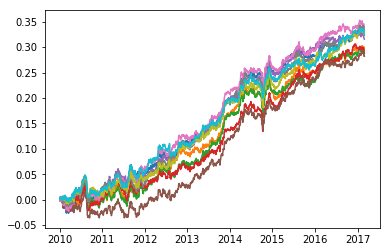

In [7]:
plt.figure()
plt.plot(combG.best_results_returns.cumsum())
plt.show()

In [9]:
df = rollup_returns(combG.best_results_returns)
df['year'] = df.sum(axis=1)
df

Qtr,1,2,3,4,year
Year,,,,,
2009,0.000000,0.000000,0.000000,0.000000,0.000000
2010,-0.019015,0.018243,0.003335,0.010224,0.012787
2011,0.017542,0.005751,0.013151,0.008162,0.044606
2012,0.012116,0.015583,0.005259,0.024065,0.057023
2013,0.010542,0.004651,0.020452,0.039345,0.074990
2014,0.024213,0.037975,-0.009288,0.009098,0.061999
2015,0.018920,0.011350,0.002414,-0.001477,0.031208
2016,0.026504,-0.008087,0.013018,0.005872,0.037307
2017,0.003311,NaN,NaN,NaN,0.003311
